# Brand Potential of NBA Players

### Introduction

Companies and brands are always looking at which professional athelete to bring on to represent their vision. A lot of the big brands tie themselves to the best players, Lebron James, Kevin Durant, Steph Curry, James Harden, etc. 
A big factor from the players perspective on which brand to sign for comes down to who makes the offer first - early in the career of the potential star. From a brand perspective the question becomes, "How do we recognize a potential star player to be able to make an offer earlier in their career?".

### Our goal

Here we have a dataset containing data for all NBA players for the 2018-2021 seasons. From this we seek to answer the following questions:

    1. Are there players not in the top 10 that exhibit similar stats to top players? 
    2. Of these players, are they early in their career and in a top market?
    3. Do they stay on the court? (Availability)

To answer these, we define a list of the best players and markets, look into all the player data and see how their stats relate to the best players. We also look into the market they play in, their age, and their availablility.

We believe that there are players that fit the category of someone we would sign to our brand. This player ideally would be outside the top 10, under 23 years old, in a good market, stays on the court, and has significant contributions on the game.

To measure what significant contribution is, the key metric we use is player efficiency rating, which is a combination of all of their game statistics.

In [27]:
# We can start by defining the top players and the top markets

top_players_list = ['LeBron James', 'Kevin Durant', 'Stephen Curry', 'James Harden', 'Kawhi Leonard', 'Joel Embiid',
              'Paul George', 'Anthony Davis', 'Giannis Antetokounmpo']

top_market_teams = ['LAL', 'LAC', 'NYK', 'BRK', 'GSW', 'MIA', 'BOS']

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [46]:
import plotly.io as pio

pio.renderers
pio.renderers.default = "svg"

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [30]:
stats = pd.read_csv('NBA_stats.csv')

### Calculating Efficiency

A players efficiency rating is a popular metric in the world of basketball. It takes into account many metrics of a players game and is defined as follows:

(Points + Rebounds + Assists + Steals + Blocks - Missed Field Goals - Missed Free Throws - Turnovers) / Games Played


We can use this metric to compare potential stars to top players.

In [31]:
stats['Player_Efficiency'] = (stats.Points + stats['Total Rebounds'] + stats['Assists'] + stats['Steals'] + stats['Blocks'] - (stats['Free Throws Attempted'] - stats['Free Throws']) - (stats['Fields Goal Attempted'] - stats['Fields Goal']) - stats['Turnovers'] / (stats.Games))

In [32]:
# We can limit our columns to the ones we need
stats = stats.drop(['Rank', 'Personal Fouls', 'Turnovers', 'Offensive Rebounds', 'Defensive Rebounds', 'Steals', '2-points Field Goal', '2-points Field Goal Attempted', 'Free Throws', 'Free Throws Attempted'], axis=1)

stats['top_player'] = np.where(stats.Player.isin(top_players_list), 1,0)
stats['top_market'] = np.where(stats.Team.isin(top_market_teams), 1, 0)

In [33]:
# Since the NaN values are for players who didn't have a field goal or 3 pointer, we can fill those with 0
stats.fillna(0, inplace=True)

In [34]:
stats = stats.loc[stats["Team"] != 'TOT']

### Does market really matter?

One part of our hypothesis is that we seek players in big markets. But does market size impact player performance?

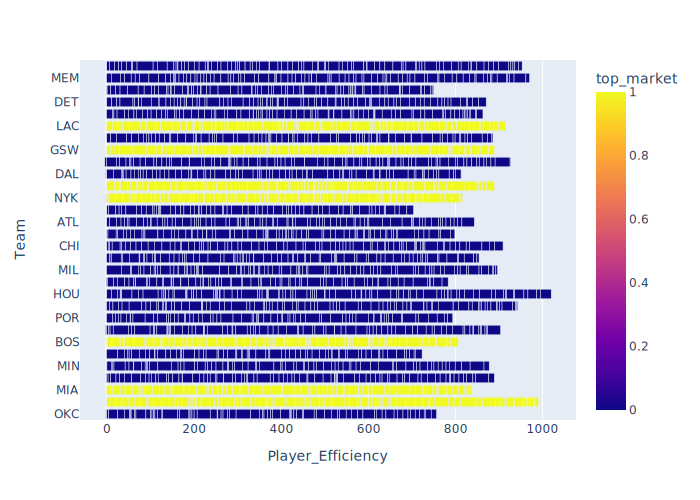

In [35]:
df = stats
fig = px.bar(df, y="Team", x="Player_Efficiency", color='top_market')
fig.show()

Looking at this it almost seems like there are quite a few players within small markets that outperform those in larger markets. Maybe we should not restrict players based on which city/market they play in.

### Getting a sense of efficiency

In [36]:
top_players = stats[stats['top_player'] == 1]

Our main goal is to find young players who fit our desired performance metrics. We can filter our data to have players who fit those metrics here.

Here we filter by our main criteria:
1. young player equal to or under 23
2. Plays significant minutes (over 30)
3. Player efficiency is comparable to top players (Player efficiency >= 31.58)
4. Player does not have to be in a big market team

Then we can compare stats such as points, FG_Pct, etc with the best players

In [37]:
young_players = stats[stats.Age <= 23]

In [38]:
top_player_efficiency_avg = stats[stats['top_player'] == 1]['Player_Efficiency'].mean()
top_player_efficiency_avg

31.581239072678482

In [39]:
potential_stars = young_players[(young_players['Minutes Played'] >= 30) & (young_players['Player_Efficiency'] >= top_player_efficiency_avg) & (young_players['top_player'] == 0)]

In [40]:
potential_stars

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,Total Rebounds,Assists,Blocks,Points,Year,Player_Efficiency,top_player,top_market
1017,Nikola Jokić,C,23,DEN,80,31.3,7.7,15.1,1.0,3.4,10.8,7.3,0.7,20.1,2019,32.061250,0,0
1312,Karl-Anthony Towns,C,23,MIN,77,33.1,8.8,17.1,1.8,4.6,12.4,3.4,1.6,24.4,2019,33.459740,0,0
1549,Luka Dončić,PG,20,DAL,61,33.6,9.5,20.6,2.8,8.9,9.4,8.8,0.2,28.8,2020,34.829508,0,0
2194,Luka Dončić,PG,21,DAL,66,34.3,9.8,20.5,2.9,8.3,8.0,8.6,0.5,27.7,2021,33.134848,0,0


We end up with 3 potential superstars (Nikola Jokic, Luka Doncic, and Karl-Anthony Towns) that are very early in their careers who we can approach for a brand deal before they become top 10 players. We can get a better visualization as to how they currently compare to top players in the league.

### Comparison

In [41]:
top_players = stats[stats['Player'].isin(top_players_list)]

In [42]:
new = potential_stars.append(top_players)

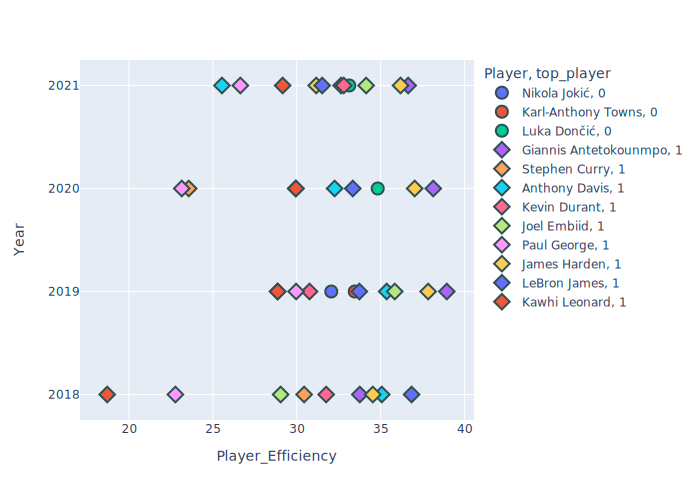

In [43]:
df = new
fig = px.scatter(df, y="Year", x="Player_Efficiency", color='Player', symbol = 'top_player',hover_data=['Age', 'Team'])
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [2018, 2019, 2020, 2021],
        ticktext = [2018, 2019, 2020, 2021]
    )
)

fig.show()

### Findings

We see that our hypothesis was correct and we found two potential stars who emerged in 2020 and 2021. Their player efficiency ratings are lower than some of the top players in the league but they are well within the range. Given their age we already see that there is time for them to mature into the league. 

Using this we can start to make an informed decision about approaching these players about brand deals.
These metrics are for an ideal prospect. We can always adjust for age and cutoff of player efficiency rating to see if we find any other potential stars. We could see how changing the age to 25 and player efficiency rating between 20-24 may give us more players to approach.

### Going further

Now that we have identified our potential stars, we can track and see how they have progressed from 2018-2021 to see if there is a specific trend in their Player Efficiency or other metrics.

In [44]:
stats[stats.Player.isin(['Nikola Jokić', 'Karl-Anthony Towns','Luka Dončić' ])]

,Player,Pos,Age,Team,Games,Minutes Played,Fields Goal,Fields Goal Attempted,3-points Field Goal,3-points Field Goal Attempted,Total Rebounds,Assists,Blocks,Points,Year,Player_Efficiency,top_player,top_market
324,Nikola Jokić,C,22,DEN,75,32.6,6.7,13.5,1.5,3.7,10.7,6.1,0.8,18.5,2018,29.762667,0,0
592,Karl-Anthony Towns,C,22,MIN,82,35.6,7.8,14.3,1.5,3.5,12.3,2.4,1.4,21.3,2018,30.976829,0,0
845,Luka Dončić,SG,19,DAL,72,32.2,7.0,16.5,2.3,7.1,7.8,6.0,0.3,21.2,2019,24.952778,0,0
1017,Nikola Jokić,C,23,DEN,80,31.3,7.7,15.1,1.0,3.4,10.8,7.3,0.7,20.1,2019,32.061250,0,0
1312,Karl-Anthony Towns,C,23,MIN,77,33.1,8.8,17.1,1.8,4.6,12.4,3.4,1.6,24.4,2019,33.459740,0,0
1549,Luka Dončić,PG,20,DAL,61,33.6,9.5,20.6,2.8,8.9,9.4,8.8,0.2,28.8,2020,34.829508,0,0
1706,Nikola Jokić,C,24,DEN,73,32.0,7.7,14.7,1.1,3.5,9.7,7.0,0.6,19.9,2020,30.657534,0,0
1954,Karl-Anthony Towns,C,24,MIN,35,33.9,9.0,17.8,3.3,7.9,10.8,4.4,1.2,26.5,2020,33.511429,0,0
2194,Luka Dončić,PG,21,DAL,66,34.3,9.8,20.5,2.9,8.3,8.0,8.6,0.5,27.7,2021,33.134848,0,0
2366,Nikola Jokić,C,25,DEN,72,34.6,10.2,18.0,1.3,3.3,10.8,8.3,0.7,26.4,2021,38.956944,0,0


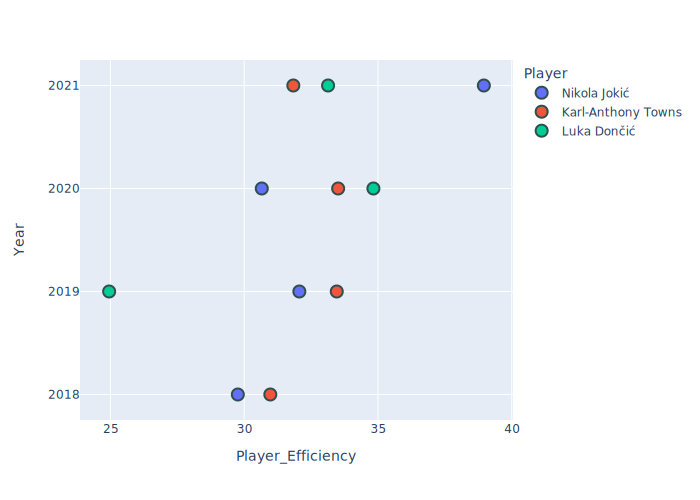

In [45]:
df= stats[stats.Player.isin(['Nikola Jokić', 'Karl-Anthony Towns','Luka Dončić' ])]
fig = px.scatter(df, y='Year', x="Player_Efficiency",color='Player',hover_data=['Age', 'Team'])
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [2018, 2019, 2020, 2021],
        ticktext = [2018, 2019, 2020, 2021]
    )
)

fig.show()

We can see how each of these players' efficiency tracked over the 4 seasons. Going further we could use this in order to set the rate of change in player efficiency as a metric to filter new potential stars going forward. This way we can track some of these players as they develop into stars. 

This way we can catch young players who aren't close to current statistics of top players but whose player efficiency is increasing similarly to the rate at which our two stars here is increasing.

### Conclusion

We simply introduce a narrative here, aiming to sign young potential stars in the NBA to our brand before they become recognized as top players in the league.

The goal is to catch them before they become top players in the league and sign them to our brand. 